# Clustering Workshop

Install the required packages before beginning

In [ ]:
# Setup
!pip install -q nltk scikit-learn matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
import re
import nltk
from wordcloud import WordCloud
import scipy.cluster.hierarchy as sch
from sklearn.manifold import TSNE

This code creates a DataFrame (df) using a list of sample sentences (docs). Each sentence in the list represents a document, and the DataFrame has a single column named "document" containing these sentences. The head() function is called at the end to display the first five rows of the DataFrame, providing a preview of the dataset. This dataset can later be used for further analysis or processing, such as text preprocessing or modeling.

In [ ]:
# Sample Data (You can replace this with your own dataset)
docs = [
    "The football team won their third consecutive championship.",
    "She broke the world record in the 100-meter sprint.",
    "The basketball game ended in a dramatic overtime victory.",
    "He scored the winning goal in the final minute of the match.",
    "The tennis player celebrated her first Grand Slam title.",
    "The marathon runner finished the race in under two hours.",
    "The soccer team trained hard for the upcoming tournament.",
    "The baseball pitcher threw a perfect game.",
    "The hockey player scored a hat trick in the final period.",
    "He received a gold medal at the Summer Olympics.",
    "The swimmer set a new national record in the 200-meter freestyle.",
    "The rugby team celebrated their victory with a parade.",
    "The golfer made an impressive hole-in-one on the 18th hole.",
    "The volleyball team dominated their opponents in straight sets.",
    "She won the national championship in gymnastics.",
    "The track team finished first in the relay race.",
    "The cricket match was interrupted by heavy rain.",
    "He set a new personal best in the long jump.",
    "The boxing match ended with a knockout in the second round.",
    "The skier took first place in the downhill race.",
    "The cyclist crossed the finish line in first place.",
    "The baseball player hit a home run in his debut game.",
    "The wrestling match was a hard-fought battle.",
    "The swimmer took silver in the 400-meter medley.",
    "The football coach praised the team's performance after the game.",
    "The basketball player made a game-winning three-pointer.",
    "The coach motivated the players before the championship final.",
    "The judo athlete earned a bronze medal in the World Championship.",
    "The tennis match was delayed due to bad weather.",
    "The boxing champion defended his title successfully.",
    "The snowboarding team showed off their new tricks at the competition.",
    "The baseball team celebrated their playoff berth with a team photo.",
    "The soccer captain gave an inspiring speech before the final.",
    "The runner set a personal record in the 5K race.",
    "The golf tournament attracted players from around the world.",
    "The football quarterback threw for over 400 yards in the game.",
    "The athlete’s dedication to training paid off with a gold medal.",
    "The swimmer broke the previous world record by two seconds.",
    "The wrestler claimed victory with a pin in the final round.",
    "The soccer team had an undefeated season.",
    "The coach emphasized teamwork as key to the team's success.",
    "The basketball player made an impressive block in the final minutes.",
    "The volleyball team celebrated their regional championship.",
    "The tennis match was a thrilling five-set battle.",
    "The football player was named MVP of the game.",
    "The referee made a controversial call during the soccer match.",
    "The marathon runner collapsed just before the finish line.",
    "The team rallied from behind to win the game in the last seconds.",
    "The baseball outfielder made a diving catch to save the game.",
    "The tennis player retired due to an injury in the second set.",
    "The hockey team advanced to the playoffs after a tight victory.",
    "The basketball star signed a multi-million dollar contract.",
    "The cyclist wore a yellow jersey after winning the stage.",
    "The football team celebrated their victory with fireworks.",
    "The golfer finished second in a major tournament.",
    "The gymnast scored a perfect 10 on her floor routine."
]

df = pd.DataFrame({'document': docs})
df.head()

,document
0,The football team won their third consecutive ...
1,She broke the world record in the 100-meter sp...
2,The basketball game ended in a dramatic overti...
3,He scored the winning goal in the final minute...
4,The tennis player celebrated her first Grand S...


##Text Preprocessing
Preprocessing Steps:
1. Lowercase Conversion

  - Converts all text to lowercase.

  - Example: "Data Science" → "data science"

  - Why: Prevents the model from treating "Data" and "data" as different words.

2. Remove Non-Alphabetic Characters

  - Strips out numbers, punctuation, and special symbols.

  - Example: "@hello123!" → "hello"

  - Why: These characters don't typically contribute meaning in topic clustering.

3. Remove Stopwords

  - Uses NLTK's stopword list to remove common words (e.g., “the”, “is”, “in”).

  - Example: "the machine is learning" → "machine learning"

  - Why: Stopwords are very frequent but carry little semantic weight.

4. Tokenization & Join

  - Splits text into words (tokens), filters them, and then rejoins into cleaned sentences.

  - Resulting text is simpler, more focused on meaningful content.


In [ ]:
#  Preprocessing
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def preprocess(text):
    # Lowercase
    text = text.lower()
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize by splitting
    tokens = text.split()
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['clean'] = df['document'].apply(preprocess)
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,document,clean
0,The football team won their third consecutive ...,football team third consecutive championship
1,She broke the world record in the 100-meter sp...,broke world record meter sprint
2,The basketball game ended in a dramatic overti...,basketball game ended dramatic overtime victory
3,He scored the winning goal in the final minute...,scored winning goal final minute match
4,The tennis player celebrated her first Grand S...,tennis player celebrated first grand slam title


This code uses the TfidfVectorizer from scikit-learn to convert the cleaned text data in the df['clean'] column into a sparse matrix of TF-IDF features. The fit_transform() method learns the vocabulary and IDF (Inverse Document Frequency) from the text data, and then transforms the text into a numerical representation (TF-IDF values), which is stored in the variable X. This transformation is typically used for machine learning models or clustering tasks.

In [ ]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['clean'])


## PCA

**PCA (Principal Component Analysis)**: a dimensionality reduction technique

- Transforms high-dimensional data (like TF-IDF vectors) into fewer components that capture the most important variance in the data.


Why use PCA?
- Reduces High-Dimensional TF-IDF Vectors – Condenses thousands of word dimensions into a smaller, more manageable space.
- Enables 2D Visualization – Helps represent text data visually, making patterns and relationships clearer.
- Reveals Document Similarities – Identifies how documents relate to each other based on word usage and meaning.



Visualizing PCA using a Scree Plot

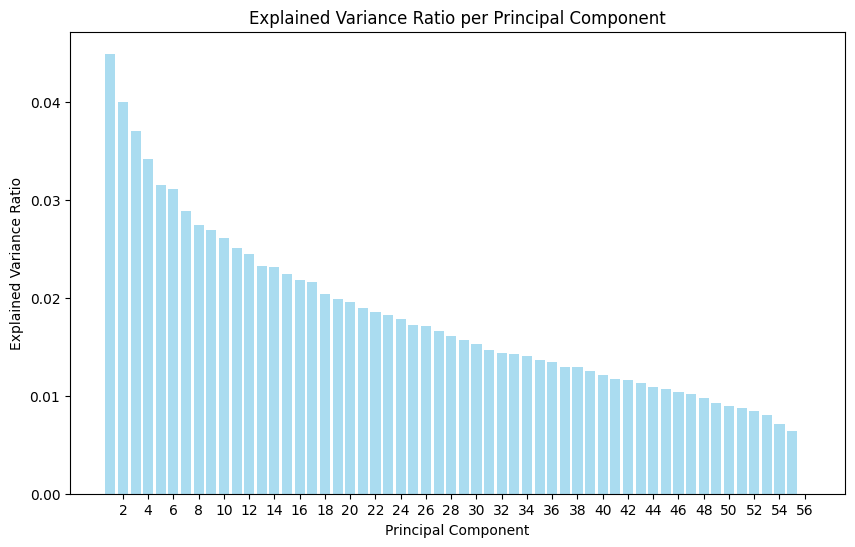

In [ ]:
 # PCA for the data
pca = PCA()
X_dense = X.toarray()  # Convert sparse matrix to dense
pca.fit(X_dense)

# Explained variance ratio for each principal component
explained_variance = pca.explained_variance_ratio_

# Number of components
n_components = len(explained_variance)

# Plotting the bar chart for explained variance ratio
plt.figure(figsize=(10, 6))

# Bar chart for explained variance ratio
plt.bar(range(1, n_components + 1), explained_variance, alpha=0.7, color='skyblue')

# Adding labels and title
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio per Principal Component')

# Customize x-ticks to match the number of components
plt.xticks(np.arange(2, n_components + 1, 2))

# Show the plot
plt.show()


### K-Means Clustering with PCA

**K-Means Clustering**: an unsupervised clustering algorithm that partitions data into K clusters based on feature similarity

How It Works:
Choose the number of clusters (K).

Initialize K centroids randomly.

Assign each data point to the nearest centroid.

Update centroids by computing the mean of assigned points.

Repeat until centroids stabilize.



KMeans Cluster 0:
  baseball
  game
  finish
  line
  golfer

KMeans Cluster 1:
  team
  football
  celebrated
  victory
  game

KMeans Cluster 2:
  match
  final
  scored
  battle
  soccer

KMeans Cluster 3:
  race
  set
  personal
  runner
  finished

KMeans Cluster 4:
  world
  meter
  swimmer
  record
  broke


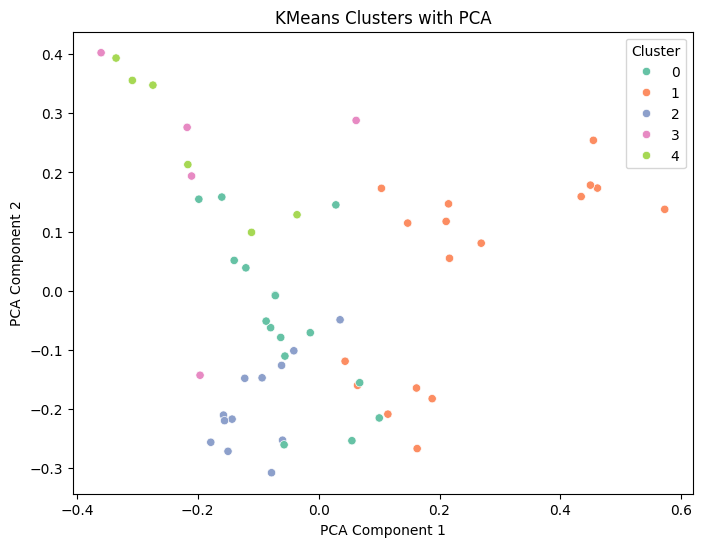

In [ ]:
# KMeans Clustering
k = 5  # You can experiment with different values
kmeans_model = KMeans(n_clusters=k, random_state=42)
df['kmeans_cluster'] = kmeans_model.fit_predict(X)

# Top Terms Per KMeans Cluster
def get_top_keywords(model, vectorizer, n_terms=5):
    terms = vectorizer.get_feature_names_out()
    order_centroids = model.cluster_centers_.argsort()[:, ::-1]
    for i in range(model.n_clusters):
        print(f"\nKMeans Cluster {i}:")
        for idx in order_centroids[i, :n_terms]:
            print(f"  {terms[idx]}")

get_top_keywords(kmeans_model, vectorizer)

# KMeans Cluster Visualization
pca = PCA(n_components=2)
x_pca = pca.fit_transform(X.toarray())

plt.figure(figsize=(8,6))
sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], hue=df['kmeans_cluster'], palette='Set2')
plt.title('KMeans Clusters with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

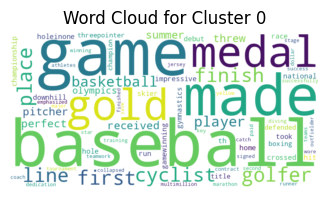

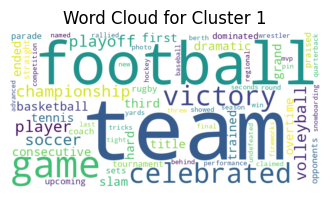

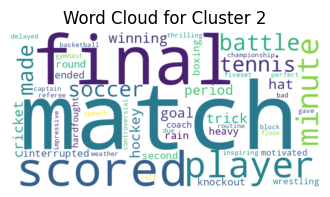

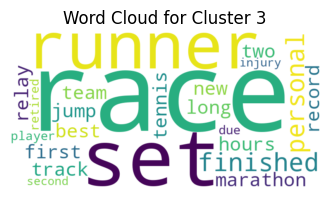

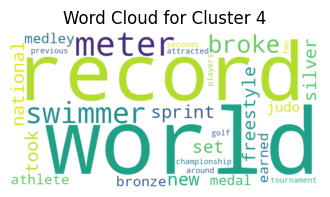

In [ ]:
# create a word clouds for clusters
def generate_word_cloud(cluster_data, cluster_num):
    # Get the indices of the documents in the current cluster
    cluster_docs = df[df['kmeans_cluster'] == cluster_num]['clean']

    # Combine all the documents in this cluster into a single string
    text = ' '.join(cluster_docs)

    # Generate the word cloud for this text
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Plot the word cloud
    plt.figure(figsize=(4,4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Cluster {cluster_num}')
    plt.show()

# Generate Word Cloud for each KMeans cluster
for i in range(k):  # k is the number of clusters you set earlier (e.g., 3)
    generate_word_cloud(df['clean'], i)

### Hierarchical Clustering with PCA

**Hierarchical Clustering**: builds a hierarchy of clusters without predefining K.

**Dendrogram**: A tree-like diagram that visualizes the clustering process and helps determine the optimal number of clusters.



---



Two Main Approaches:

**Agglomerative**: Bottom-up approach, starting with individual points and merging clusters.

**Divisive**: Top-down approach, starting with one large cluster and splitting recursively.

#### Creating a Dendrogram

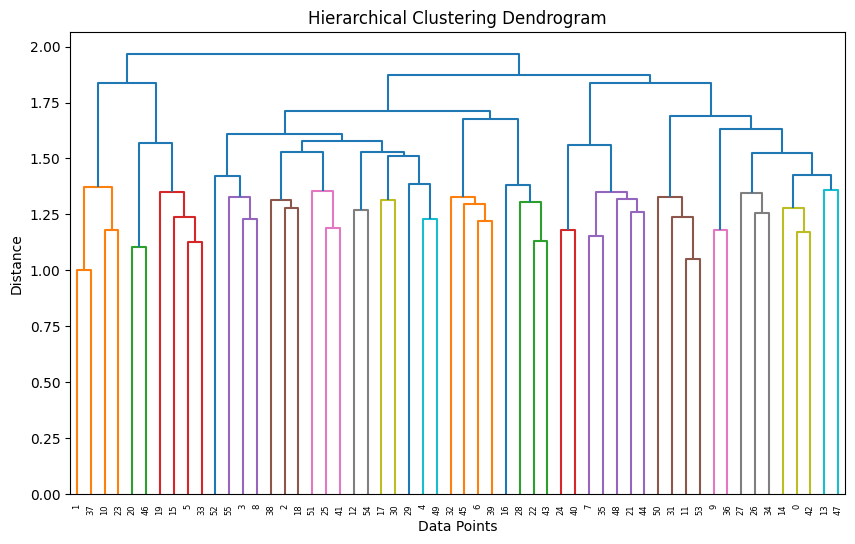

In [ ]:
# Compute the linkage matrix
linkage_matrix = sch.linkage(X.toarray(), method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
sch.dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

After we have creating the dendrogram, we can pick a height distance and cluster based on that. Note: the higher the distance the fewer number of clusters.


Top Terms Per Hierarchical Clusters:

KMeans Cluster 0:
  baseball
  game
  finish
  line
  golfer

KMeans Cluster 1:
  team
  football
  celebrated
  victory
  game

KMeans Cluster 2:
  match
  final
  scored
  battle
  soccer

KMeans Cluster 3:
  race
  set
  personal
  runner
  finished

KMeans Cluster 4:
  world
  meter
  swimmer
  record
  broke


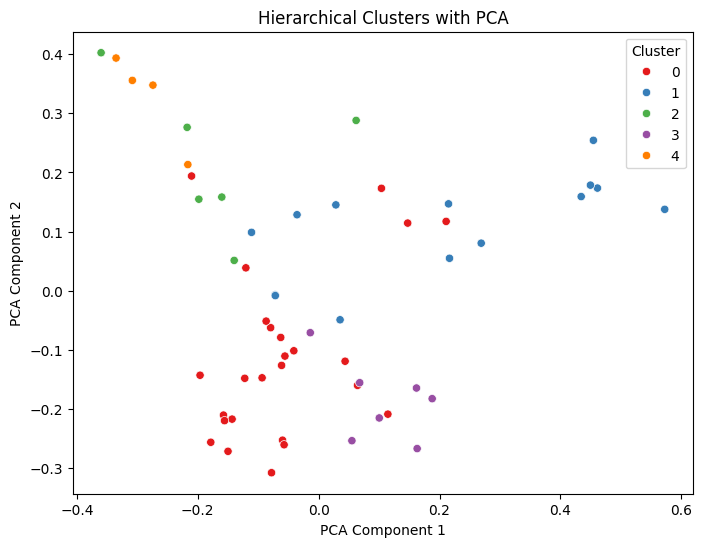

In [ ]:
# Pick a distance threshold (set it based on the dendrogram)
distance_threshold = 1.8  # Modify this value based on your observation of the dendrogram

# Hierarchical Clustering (Agglomerative)
hierarchical_model = AgglomerativeClustering(distance_threshold=distance_threshold, n_clusters=None)
df['hierarchical_cluster'] = hierarchical_model.fit_predict(X.toarray())

# Top Terms Per Hierarchical Cluster
print("\nTop Terms Per Hierarchical Clusters:")
# Using the same function to print keywords for hierarchical clusters
get_top_keywords(kmeans_model, vectorizer)

# Hierarchical Cluster Visualization
plt.figure(figsize=(8,6))
sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], hue=df['hierarchical_cluster'], palette='Set1')
plt.title('Hierarchical Clusters with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()



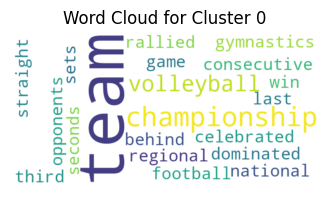

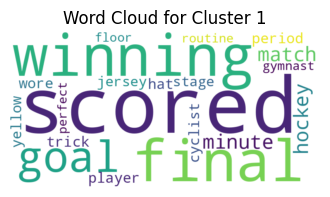

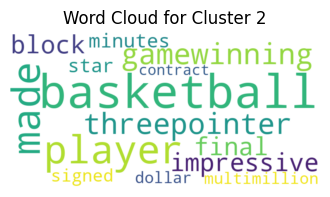

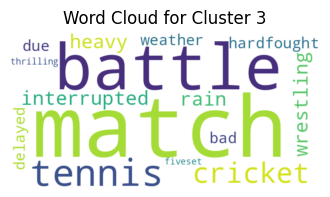

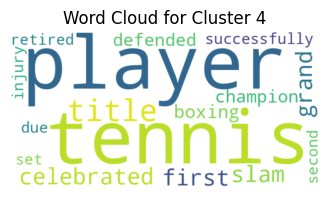

In [ ]:
# create a word clouds for clusters
def generate_word_cloud(cluster_data, cluster_num):
    # Get the indices of the documents in the current cluster
    cluster_docs = df[df['hierarchical_cluster'] == cluster_num]['clean']

    # Combine all the documents in this cluster into a single string
    text = ' '.join(cluster_docs)

    # Generate the word cloud for this text
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Plot the word cloud
    plt.figure(figsize=(4,4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Cluster {cluster_num}')
    plt.show()

for i in range(k):  # k is the number of clusters you set earlier (e.g., 3)
    generate_word_cloud(df['clean'], i)

## t-SNE

**t-SNE (t-Distributed Stochastic Neighbor Embedding)**: A non-linear dimensionality reduction algorithm that maps high-dimensional data to 2D or 3D space while preserving local structure.

Why use t-SNE?
-
Simplifies Complex Data – Reduces high-dimensional data to 2D or 3D, making visualization intuitive and presentation-friendly.
- Reveals Hidden Patterns – Highlights natural clusters and relationships, ideal for customer segmentation, biological data, and word embeddings.
- Enhances Interpretability – Provides a clear, non-linear representation of data structures that traditional methods might miss.

**Perplexity**

Low perplexity (e.g., 5-30): Focuses on preserving local structure (closer neighbors).

High perplexity (e.g., 30-100): Takes more global structure into account, meaning it considers more distant points when calculating similarity.



### K-Means Clustering with t-SNE

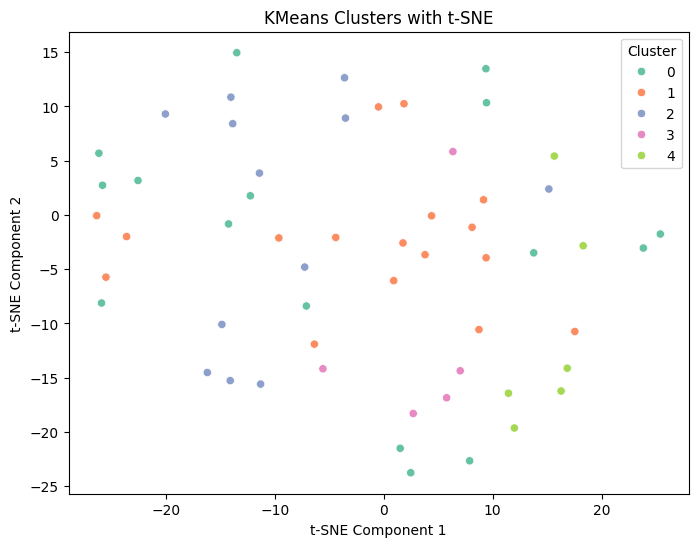

In [ ]:
# t-SNE K-Means Cluster Visualization
tsne = TSNE(n_components=2, random_state=42, perplexity=10)  # Adjust perplexity
x_tsne = tsne.fit_transform(X.toarray())

plt.figure(figsize=(8,6))
sns.scatterplot(x=x_tsne[:, 0], y=x_tsne[:, 1], hue=df['kmeans_cluster'], palette='Set2')
plt.title('KMeans Clusters with t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster')
plt.show()



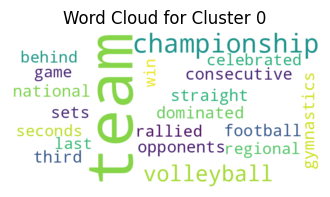

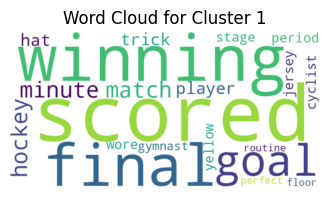

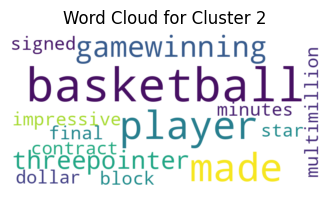

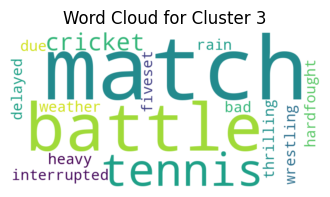

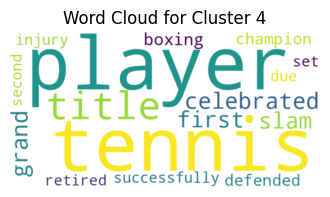

In [ ]:
# create a word clouds for clusters
def generate_word_cloud(cluster_data, cluster_num):
    # Get the indices of the documents in the current cluster
    cluster_docs = df[df['hierarchical_cluster'] == cluster_num]['clean']

    # Combine all the documents in this cluster into a single string
    text = ' '.join(cluster_docs)

    # Generate the word cloud for this text
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Plot the word cloud
    plt.figure(figsize=(4,4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Cluster {cluster_num}')
    plt.show()

for i in range(k):  # k is the number of clusters you set earlier (e.g., 3)
    generate_word_cloud(df['clean'], i)

### Hierarchical Clustering with t-SNE

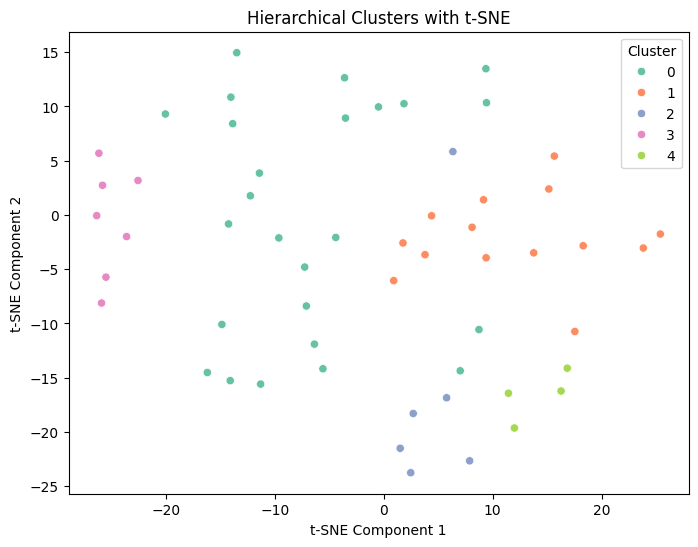

In [ ]:
# t-SNE Cluster Visualization
tsne = TSNE(n_components=2, random_state=42, perplexity=10)  # Adjust perplexity
x_tsne = tsne.fit_transform(X.toarray())

plt.figure(figsize=(8,6))
sns.scatterplot(x=x_tsne[:, 0], y=x_tsne[:, 1], hue=df['hierarchical_cluster'], palette='Set2')
plt.title('Hierarchical Clusters with t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster')
plt.show()



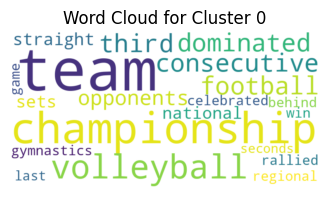

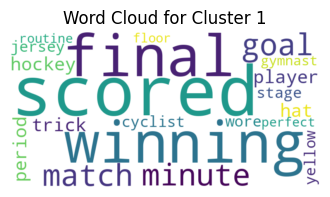

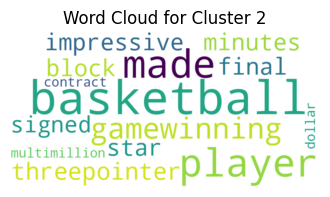

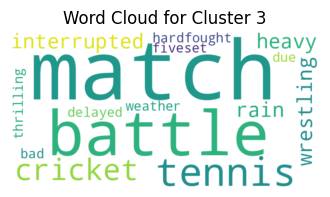

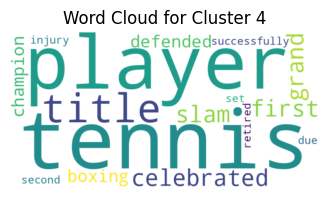

In [ ]:
# create a word clouds for clusters
def generate_word_cloud(cluster_data, cluster_num):
    # Get the indices of the documents in the current cluster
    cluster_docs = df[df['hierarchical_cluster'] == cluster_num]['clean']

    # Combine all the documents in this cluster into a single string
    text = ' '.join(cluster_docs)

    # Generate the word cloud for this text
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Plot the word cloud
    plt.figure(figsize=(4,4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Cluster {cluster_num}')
    plt.show()

for i in range(k):  # k is the number of clusters you set earlier (e.g., 3)
    generate_word_cloud(df['clean'], i)